In [12]:
%matplotlib inline
from matplotlib.ticker import FuncFormatter
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import pandas as pd

colors = ['#9ACBCB', '#2F2F31', '#F5A445', '#B8A7D6', '#FFF39D', '#3296FF']

In [13]:
input_csv = '../../data/mock/agency_performance_costcategory_breakdown.csv'
df = pd.read_csv(input_csv)
df

,Cost Category,Financial Year,Total Cost
0,Consultants,2014-15,7080
1,Contractor Costs,2014-15,38839
2,Supplier Costs,2014-15,106120
3,Employee Costs,2014-15,896010
4,*Volumes*,2014-15,14871
5,Consultants,2015-16,14893
6,Contractor Costs,2015-16,243462
7,Supplier Costs,2015-16,61284
8,Employee Costs,2015-16,669962
9,*Volumes*,2015-16,11727


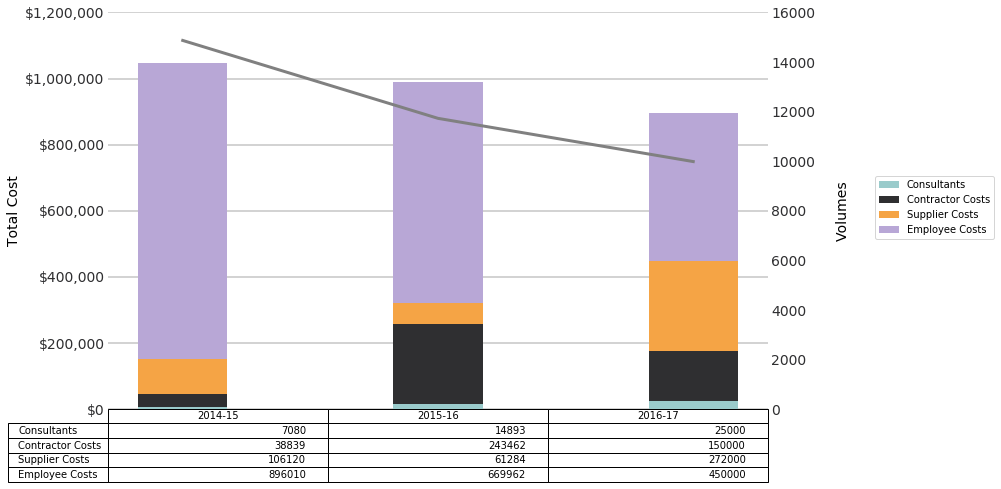

In [14]:
# Initialize figure and axes
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(12,6)

categories = [x for x in df['Cost category'].unique() if x != '*Volumes*']
years = df['Financial Year'].unique()

df2 = pd.DataFrame(columns=categories)
for year in years:
    points = []
    for category in categories:
        row = df[(df['Financial Year'] == year) & (df['Cost category'] == category)]
        points.append(row['Total Cost'].iloc[0])
    df2.loc[year] = points

color_map = {x:colors[i] for i,x in enumerate(df2.columns)}
cumulative_points = []
for colname in df2.columns:
    points = list(df2[colname])
    if cumulative_points:
        bottom = [sum(i) for i in zip(*cumulative_points)]
        ax.bar(range(len(years)), points, bottom=bottom, label=colname, width=0.35, zorder=2, color=color_map[colname])
    else:
        ax.bar(range(len(years)), points, width=0.35, label=colname, zorder=2, color=color_map[colname])
    cumulative_points.append(points)

ax.set_ylabel('Total Cost', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.grid(color='lightgray', linewidth=2)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x,pos: '${:,.0f}'.format(x)))
ax.tick_params(axis='y', which='major', labelsize=14, labelcolor='#2F2F31', length=0)
ax.tick_params(axis='x', which='major', length=0)
ax.set_xticklabels([], position=(0,-0.04), clip_on=True)
ax.set_ylim(0,1200000)

axt = ax.twinx()
volumes = df[df['Cost category'] == '*Volumes*']
axt.plot(volumes['Total Cost'].values, color='gray', linewidth=3)
axt.set_ylabel('\nVolumes', fontsize=14)

axt.spines['top'].set_visible(False)
axt.spines['right'].set_visible(False)
axt.spines['left'].set_visible(False)
axt.spines['bottom'].set_visible(False)
axt.tick_params(axis='y', which='major', labelsize=14, labelcolor='#2F2F31', length=0)
axt.set_ylim(0,16000)

ax.legend(bbox_to_anchor=[1.35,0.6])

the_table = ax.table(
    cellText=df2.T.as_matrix(),
    rowLabels=categories,
    #rowColours=[color_map[x] for x in categories],
    colLabels=years,
    loc='bottom')
fig.tight_layout()

# Write to a file
fig.savefig('../../reports/figures/mock/agency_performance_costcategory_breakdown.pdf', bbox_inches='tight')